In [1]:
import os
import pandas as pd
import generate_dataset
import data_utils
import csv

## Create a new dataset

In [4]:
#  Define name of the dataset
dataset = 'logPete'

#  Define image shuffle seed. If None, images will not be shuffled
shuffle = 10

#  Create shift images?
shift = True

#  Define bbox scale factor
scale_factor = 3

#  Apply log stretch to big images?
logstretch = True

generate_dataset.init(dir_name=dataset, shuffle=shuffle, shift=shift, scale_factor=scale_factor, logstretch=logstretch)

Dataset name: logPete
Shuffle: 10
Shift: True
Scale factor: 3
Log stretch: True
Creating directories...
Generating image...
Generating polygons and labels...
Generating bounding boxes...
Loading the annotation array...
Saved ann.png
Looping training bboxes...


100%|██████████| 1544/1544 [01:16<00:00, 20.10it/s]


Looping validation bboxes...


100%|██████████| 386/386 [00:14<00:00, 26.19it/s]

All done yay


## Inspect dataset with a global zscale transform applied

DATASET/normalSteve/data/my_dataset/img/train/21.npy


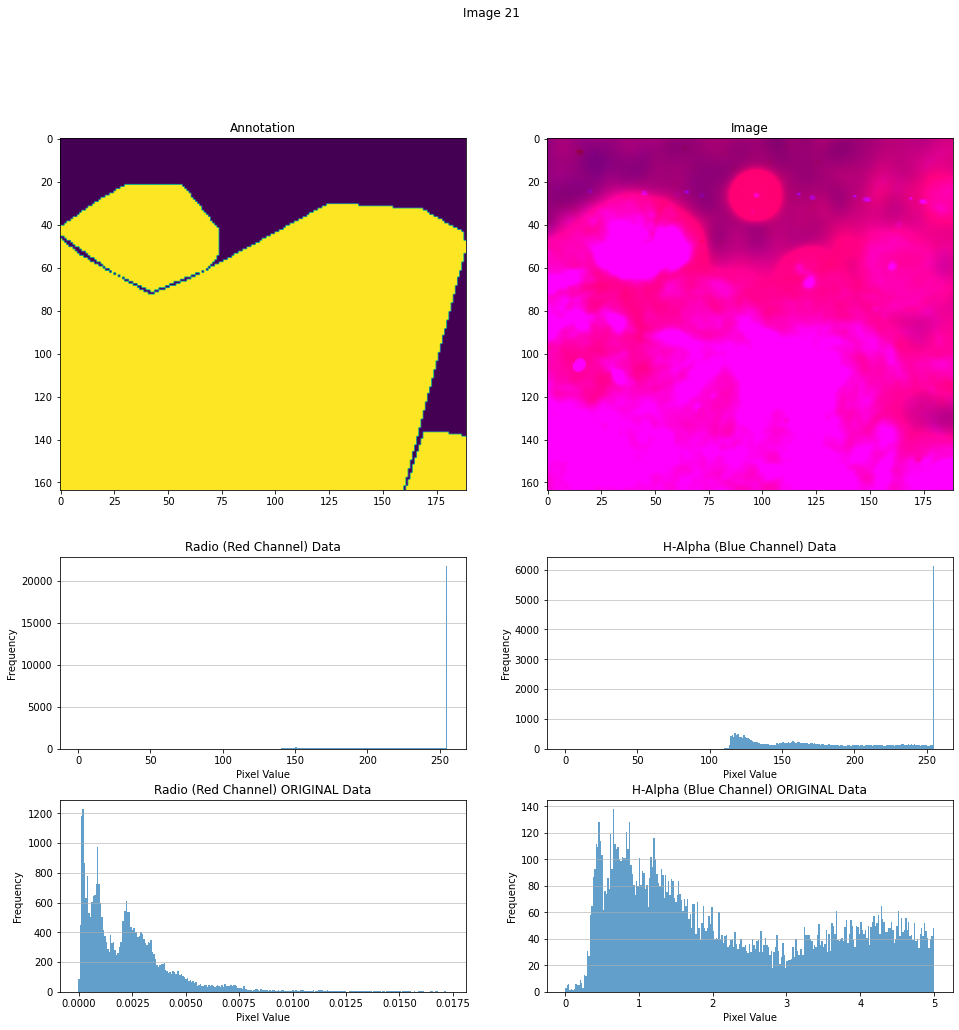


Original data statistics

         Radio Data      Ha Data
Image     21.000000    21.000000
Mean       0.002320     8.180081
Std        0.002249    26.881422
Minimum   -0.000035    -4.528942
10%        0.000245     0.913617
25%        0.000737     2.276410
50%        0.001930     6.094113
75%        0.003132    11.756575
90%        0.004763    16.002393
99%        0.011775    28.821756
Maximum    0.017227  2332.479000
Press enter for next image, 'p' for previous image, or enter image id. 'q' to quitq


In [2]:
#  Define the name of the dataset dir
dataset = 'normalSteve'

#  Compute Zscale bounds
image_path_radio = './LMC/lmc_askap_aconf.fits'
image_path_halpha = './LMC/lmc_ha_csub.fits'
bounds = data_utils.gen_img(image_path_radio, image_path_halpha, returnBounds=True)

#  Display Images and Annotations
data_utils.display_images(dataset, hist=True, bounds=bounds)

## Inspect dataset with a global log stretch applied

DATASET/logPete/data/my_dataset/img/train/21.npy


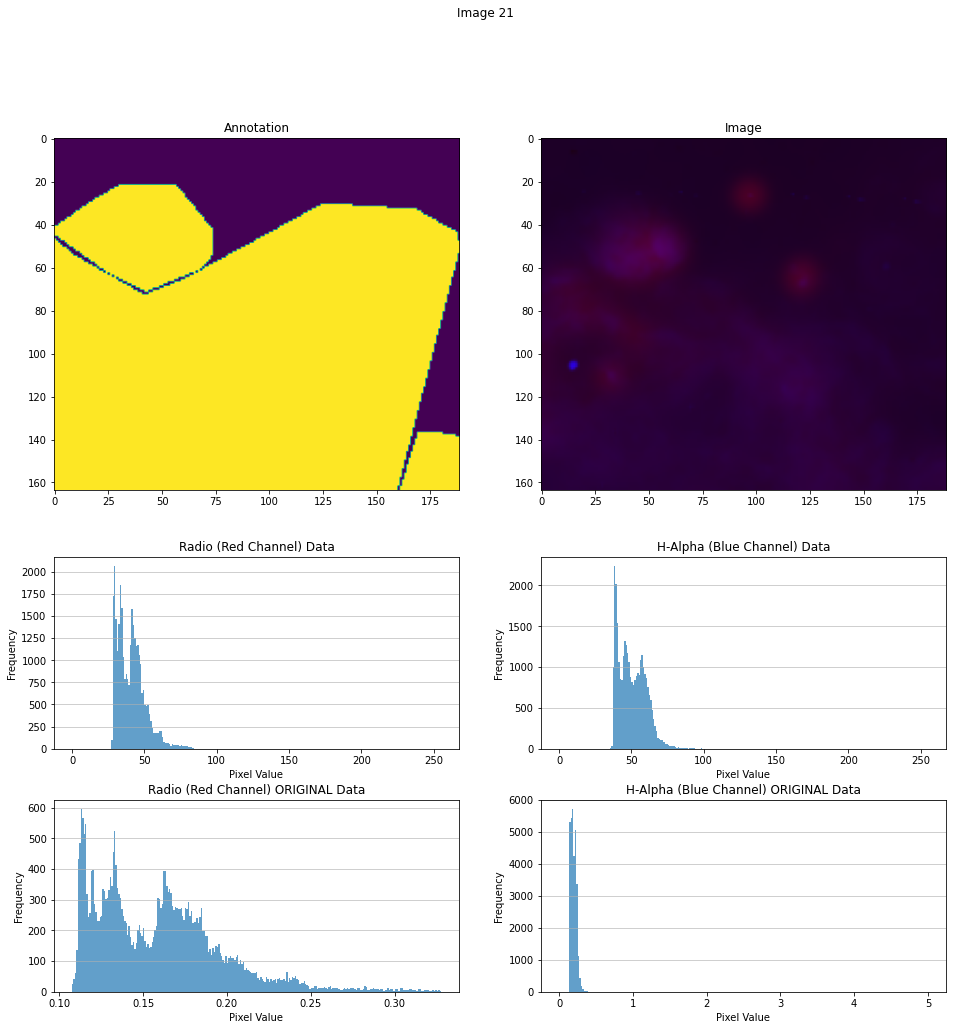


Original data statistics

         Radio Data    Ha Data
Image     21.000000  21.000000
Mean       0.159574   0.197651
Std        0.038101   0.038535
Minimum    0.107628   0.095052
10%        0.115776   0.152545
25%        0.129092   0.163963
50%        0.157028   0.191853
75%        0.180599   0.225298
90%        0.207457   0.246118
99%        0.286655   0.295284
Maximum    0.327681   0.869288
Press enter for next image, 'p' for previous image, or enter image id. 'q' to quitq


In [3]:
#  Define the name of the dataset dir
dataset = 'logPete'

#  Display Images and Annotations
data_utils.display_images(dataset, hist=True, scale='log')

In [4]:
#  Inspect logged data. These files contain statistics regarding the raw, original data.
radio_data = pd.read_csv(os.path.join('DATASET', dataset, 'radio_data.csv'))
ha_data = pd.read_csv(os.path.join('DATASET', dataset, 'ha_data.csv'))

In [5]:
radio_data.describe()

,Image,Mean,Std,Minimum,10%,25%,50%,75%,90%,99%,Maximum
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,154.000000,0.001220,0.003888,-0.000343,0.000018,0.000181,0.000459,0.001043,0.002294,0.015090,0.117795
std,89.344838,0.002949,0.008178,0.000614,0.000669,0.000834,0.001409,0.002882,0.005801,0.043927,0.269583
min,0.000000,-0.001258,0.000098,-0.002569,-0.001678,-0.001502,-0.001292,-0.001077,-0.000934,-0.000645,0.000657
25%,77.000000,0.000109,0.000644,-0.000572,-0.000263,-0.000144,-0.000006,0.000121,0.000283,0.001701,0.007961
50%,154.000000,0.000445,0.001250,-0.000283,-0.000063,0.000028,0.000163,0.000400,0.000788,0.003515,0.030376
75%,231.000000,0.001222,0.003572,-0.000035,0.000212,0.000358,0.000584,0.001011,0.001843,0.009497,0.118687
max,308.000000,0.033555,0.068625,0.002098,0.007641,0.010698,0.019247,0.034367,0.060270,0.420654,2.293909


In [6]:
ha_data.describe()

,Image,Mean,Std,Minimum,10%,25%,50%,75%,90%,99%,Maximum
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,154.000000,2.896262,20.361172,-5.280396,0.343581,0.594891,1.133486,2.455306,5.265437,25.023921,1985.859190
std,89.344838,5.075310,16.413019,2.690056,1.423996,1.979071,2.968093,5.352096,10.652440,51.227251,1357.824516
min,0.000000,-0.080268,0.175366,-9.379512,-0.333910,-0.200690,-0.094823,-0.059633,-0.010438,0.233597,2.092787
25%,77.000000,0.567183,9.210850,-7.376765,-0.086003,-0.026294,0.045049,0.220018,0.635512,3.126722,354.584780
50%,154.000000,1.341209,19.563808,-5.927027,0.005833,0.108625,0.296817,0.730536,1.643675,8.964695,2432.735400
75%,231.000000,3.186220,26.726677,-3.848233,0.232276,0.445537,0.911411,2.286908,4.872045,25.612799,3013.982200
max,308.000000,48.848263,121.987270,7.150498,17.603955,23.643603,33.826878,50.344921,99.017371,656.883158,5777.570000
